<a href="https://colab.research.google.com/github/erkangithub/erkanrepository/blob/main/tut8_batch_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Batch Simulations

The code is crashing sometimes when you try to change parameters and re-run the batch sim.

Just go to the top and click **Runtime>Restart Runtime** and re-execute the installation steps (should run pretty quickly)

In [ ]:
!pwd

/content


In [ ]:
cd /content/

/content


In [ ]:
!pwd

/content


In [ ]:
!pip install neuron
!pip install netpyne
import matplotlib
import os
import json

In [ ]:
if os.path.isdir('/content/tut8_batch_exercises'):
  !ls
  !rm -r /content/tut8_batch_exercises
  !ls

sample_data  tut8_batch_exercises
sample_data


In [ ]:
!git clone https://github.com/joaovvitor/tut8_batch_exercises.git

Cloning into 'tut8_batch_exercises'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 23 (delta 14), reused 23 (delta 14), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [ ]:
!ls

sample_data  tut8_batch_exercises


In [ ]:
cd /content/tut8_batch_exercises/

/content/tut8_batch_exercises


# Debugging sections

Run this section if you have previously ran the any batch sim, so you move back to the root folder

In [ ]:
cd /content/tut8_batch_exercises/

Run this section if you have previously ran the 'tut8_data_IClamp'


In [ ]:
if os.path.isdir('/content/tut8_batch_exercises/tut8_data_IClamp/'):
  !rm -r /content/tut8_batch_exercises/tut8_data_IClamp/
  print("IClamp data removed")

Run this section if you have previously ran the 'tut8_data_NetStims'


In [ ]:
if os.path.isdir('/content/tut8_batch_exercises/tut8_data_NetStims/'):
  !rm -r /content/tut8_batch_exercises/tut8_data_NetStims/
  print("NetStims data removed")

Run this section if you have previously ran the 'tut8_data_CellParams'


In [ ]:
if os.path.isdir('/content/tut8_batch_exercises/tut8_data_CellParams/'):
  !rm -r /content/tut8_batch_exercises/tut8_data_CellParams/
  print("CellParams data removed")

Run this section if you have previously ran the 'tut8_data_NetPar'


In [ ]:
if os.path.isdir('/content/tut8_batch_exercises/tut8_data_NetPar/'):
  !rm -r /content/tut8_batch_exercises/tut8_data_NetPar/
  print("NetPar data removed")

# Running the Batch simulation

In [ ]:
from netpyne import specs, sim
%matplotlib inline
from netpyne import specs
from netpyne.batch import Batch
import numpy as np

def changeIClamp():
        # Create variable of type ordered dictionary (NetPyNE's customized version)
        params = specs.ODict()

        # fill in with parameters to explore and range of values (key has to coincide with a variable in simConfig)
        params['clampAmplitude']=[0.05, 0.1, 0.2, 0.4, 0.6]

        # create Batch object with parameters to modify, and specifying files to use
        b = Batch(params=params, cfgFile='tut8_cfg_IClamp.py', netParamsFile='tut8_netParams_IClamp.py',)

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'IClamp'
        b.saveFolder = 'tut8_data_IClamp'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': 'tut8_init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

def changeNetStims():
        # Create variable of type ordered dictionary (NetPyNE's customized version)
        params = specs.ODict()

        # fill in with parameters to explore and range of values (key has to coincide with a variable in simConfig)
        params['netWeight']=[0.0005, 0.0010, 0.0025]
        params['interStimInterval']=[5, 2.5, 1, 0.5, 0.1]

        # create Batch object with parameters to modify, and specifying files to use
        b = Batch(params=params, cfgFile='tut8_cfg_NetStims.py', netParamsFile='tut8_netParams_NetStims.py',)

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'NetStims'
        b.saveFolder = 'tut8_data_NetStims'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': 'tut8_init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

def changeCellParameters():
        # Create variable of type ordered dictionary (NetPyNE's customized version)
        params = specs.ODict()

        # fill in with parameters to explore and range of values (key has to coincide with a variable in simConfig)
        # params['eLeak']=[-90, -80, -70, -60]
        params['gnaBar']=[0.12, 0.5, 1.0]
        params['gkBar']=[0.036,0.2,0.5]

        # create Batch object with parameters to modify, and specifying files to use
        b = Batch(params=params, cfgFile='tut8_cfg_CellParams.py', netParamsFile='tut8_netParams_CellParams.py',groupedParams=['gnaBar','gkBar'])

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'CellParams'
        b.saveFolder = 'tut8_data_CellParams'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': 'tut8_init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

def changeNetworkParameters():
        # Create variable of type ordered dictionary (NetPyNE's customized version)
        params = specs.ODict()

        # fill in with parameters to explore and range of values (key has to coincide with a variable in simConfig)
        params['conProb']=[0.1, 0.25, 0.5, 1.0]

        # create Batch object with parameters to modify, and specifying files to use
        b = Batch(params=params, cfgFile='tut8_cfg_NetPar.py', netParamsFile='tut8_netParams_NetPar.py',)

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'NetPar'
        b.saveFolder = 'tut8_data_NetPar'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': 'tut8_init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

# Main code
if __name__ == '__main__':
        # changeIClamp()
        # changeNetStims()
        changeCellParameters()
        # changeNetworkParameters()

# IClamp data

In [ ]:
!ls

__pycache__		tut8_data_IClamp
tut8_batch.py		tut8_init.py
tut8_cfg_CellParams.py	tut8_netParams_CellParams.py
tut8_cfg_IClamp.py	tut8_netParams_IClamp.py
tut8_cfg_NetPar.py	tut8_netParams_NetPar.py
tut8_cfg_NetStims.py	tut8_netParams_NetStims.py
tut8_cfg.py		tut8_netParams.py


In [ ]:
cd /content/tut8_batch_exercises/tut8_data_IClamp/

/content/tut8_batch_exercises/tut8_data_IClamp


In [ ]:
!ls

IClamp_0_cfg.json    IClamp_2.json	  IClamp_4_traces.png
IClamp_0.json	     IClamp_2_traces.png  IClamp_batch.json
IClamp_0_traces.png  IClamp_3_cfg.json	  IClamp_batchScript.py
IClamp_1_cfg.json    IClamp_3.json	  IClamp_netParams.py
IClamp_1.json	     IClamp_3_traces.png  __pycache__
IClamp_1_traces.png  IClamp_4_cfg.json
IClamp_2_cfg.json    IClamp_4.json


In [ ]:
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/tut8_batch_exercises/tut8_data_IClamp/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()
for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))

# NetStims data

In [ ]:
cd /content/tut8_batch_exercises/tut8_data_NetStims/

/content/tut8_batch_exercises/tut8_data_NetStims


In [ ]:
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/tut8_batch_exercises/tut8_data_NetStims/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()
for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))

# CellParams exercise

**Build a simulation that:**

1) changes the channel properties that affect the resting membrane potential of the cell

2) changes the maximum conductance of Na and K

3) which other properties can we change?

# CellParams data

In [ ]:
cd /content/tut8_batch_exercises/tut8_data_CellParams/

/content/tut8_batch_exercises/tut8_data_CellParams


CellParams_0_0_traces.png


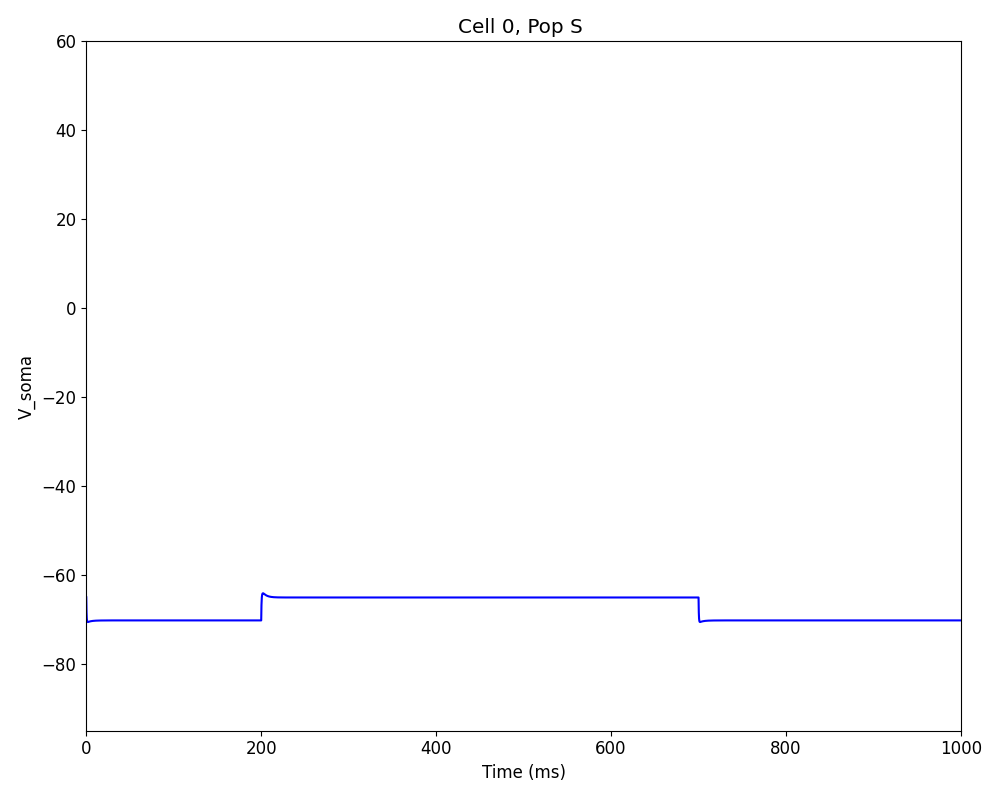

CellParams_1_1_traces.png


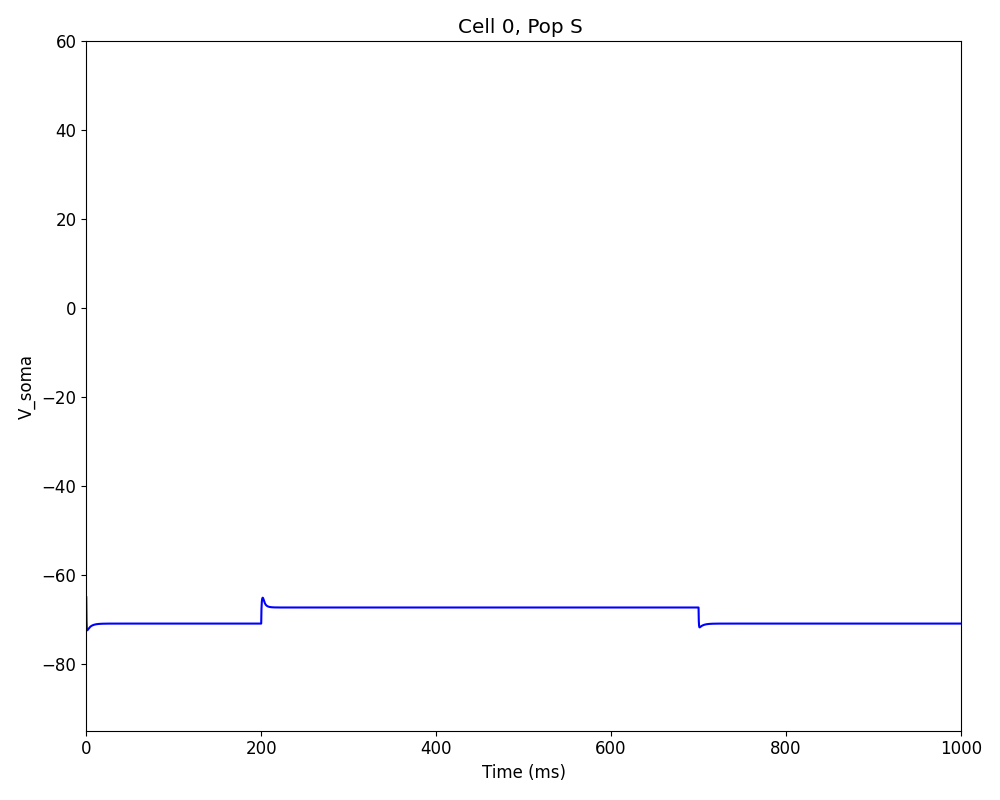

CellParams_2_2_traces.png


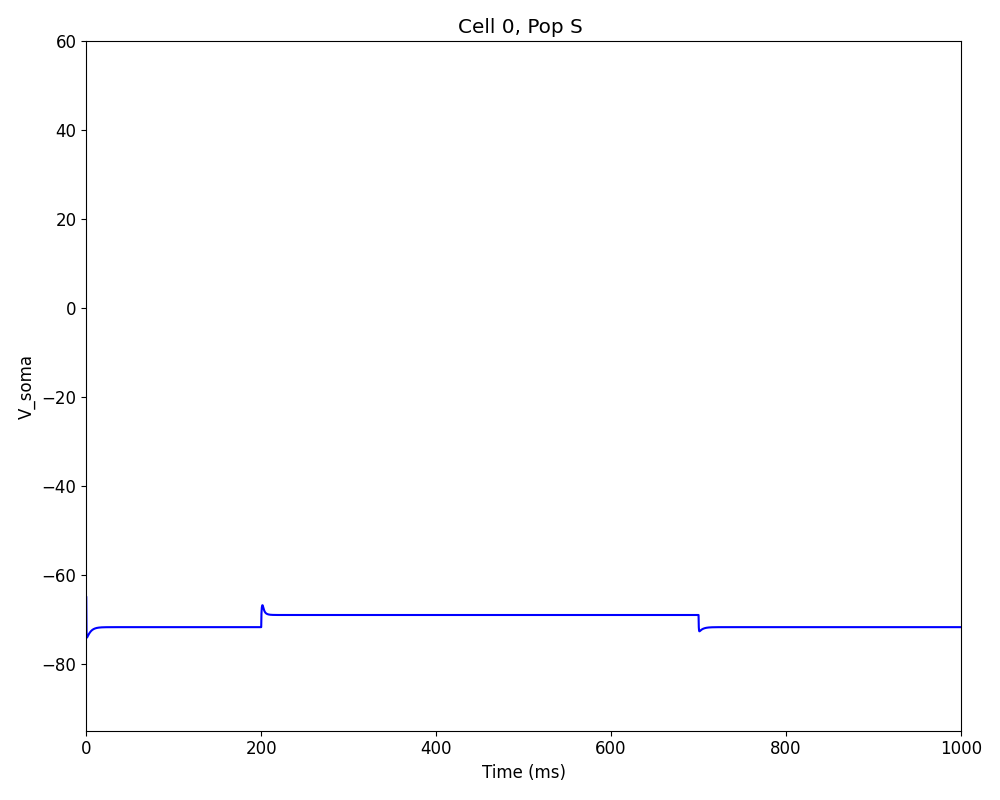

In [ ]:
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/tut8_batch_exercises/tut8_data_CellParams/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()
for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))

# NetPar exercise

**Build a simulation that:**

1) changes the connection Probability

2) changes the connection delay

3) changes the synaptic mechanism

# NetPar data

In [ ]:
cd /content/tut8_batch_exercises/tut8_data_NetPar/

/content/tut8_batch_exercises/tut8_data_NetPar


View the 2D network plots

NetPar_0_plot_2Dnet.png


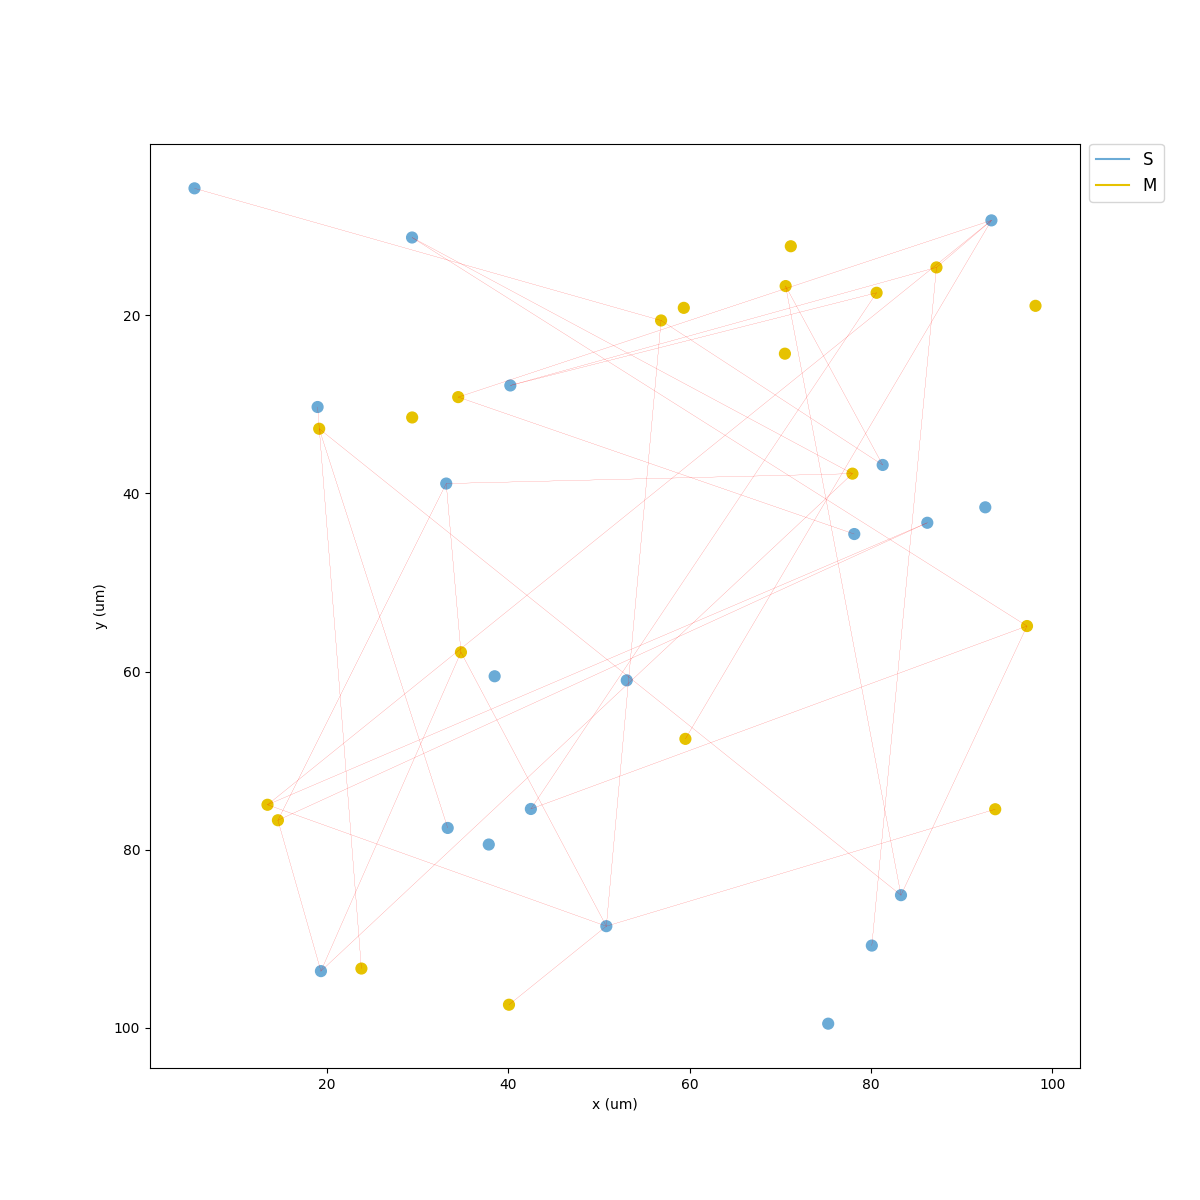

NetPar_1_plot_2Dnet.png


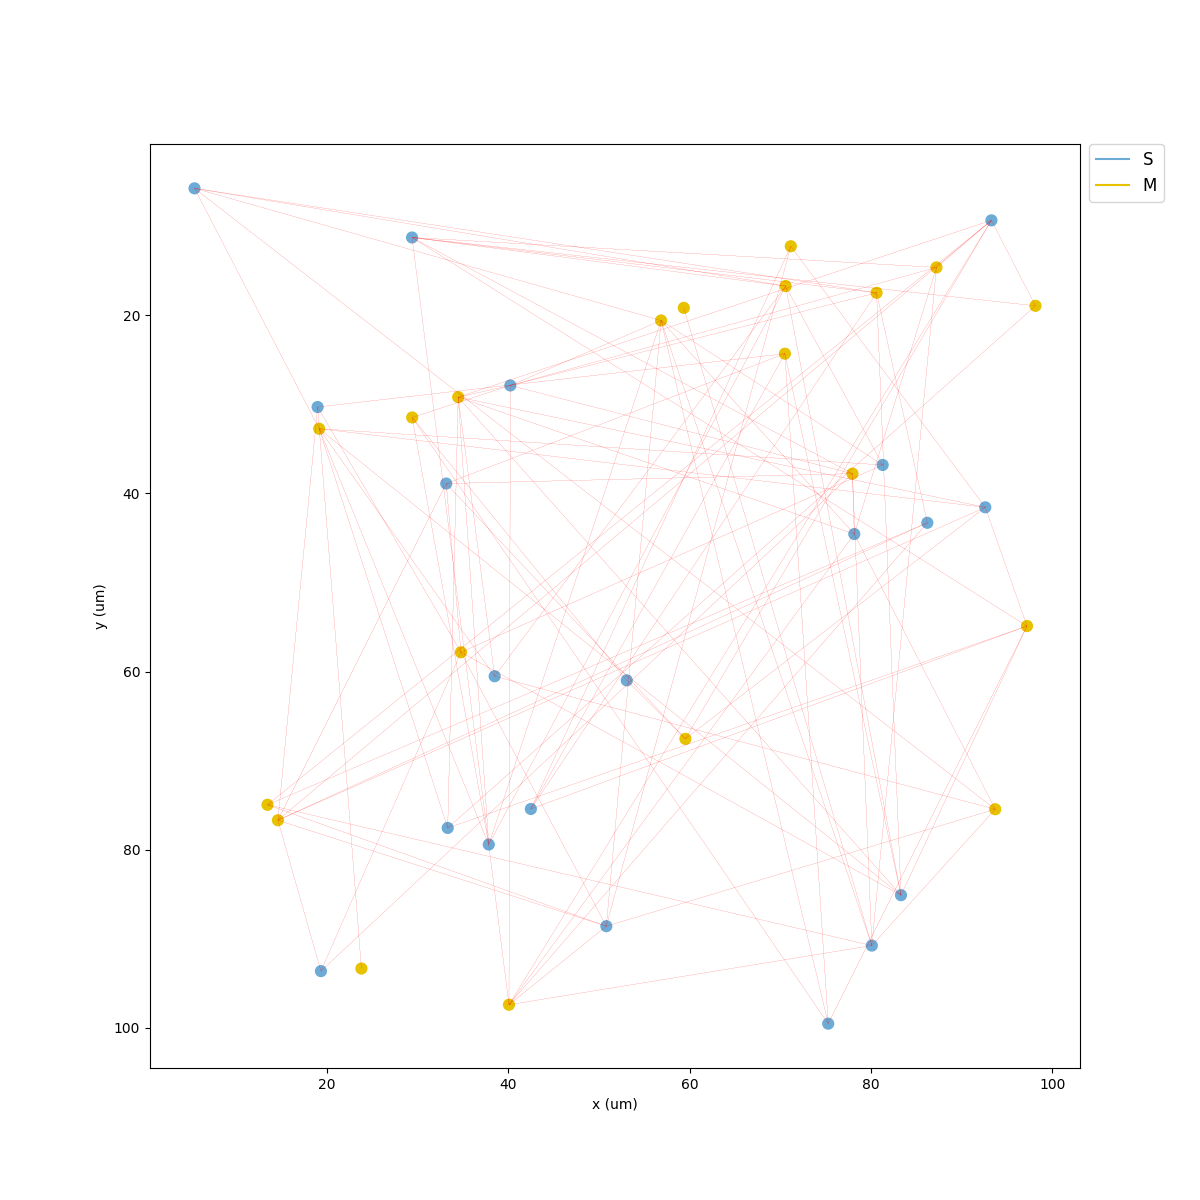

NetPar_2_plot_2Dnet.png


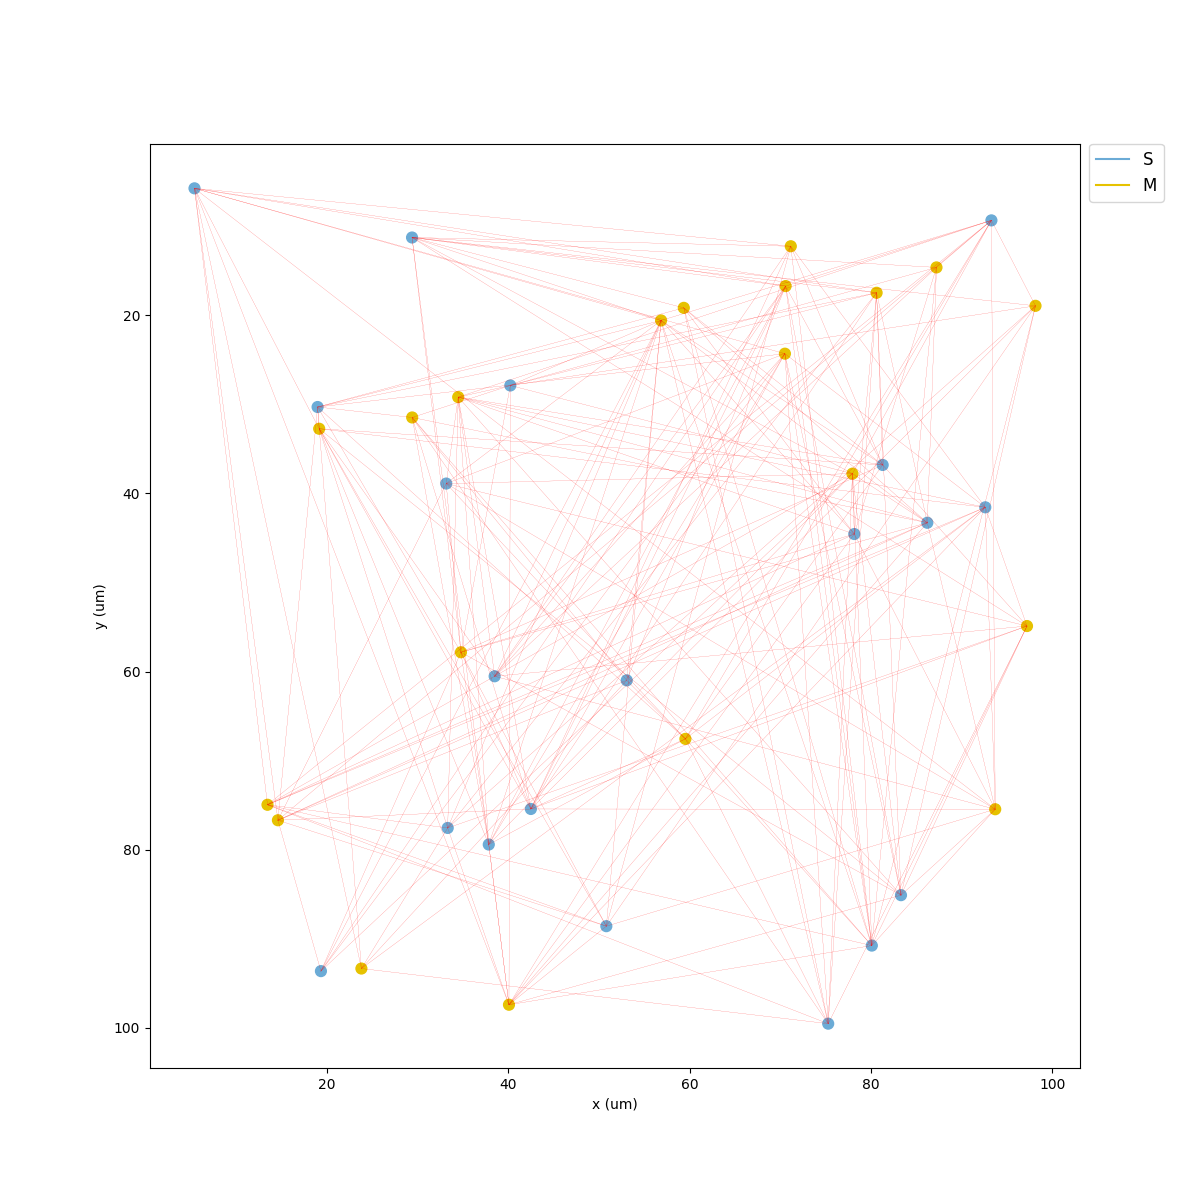

NetPar_3_plot_2Dnet.png


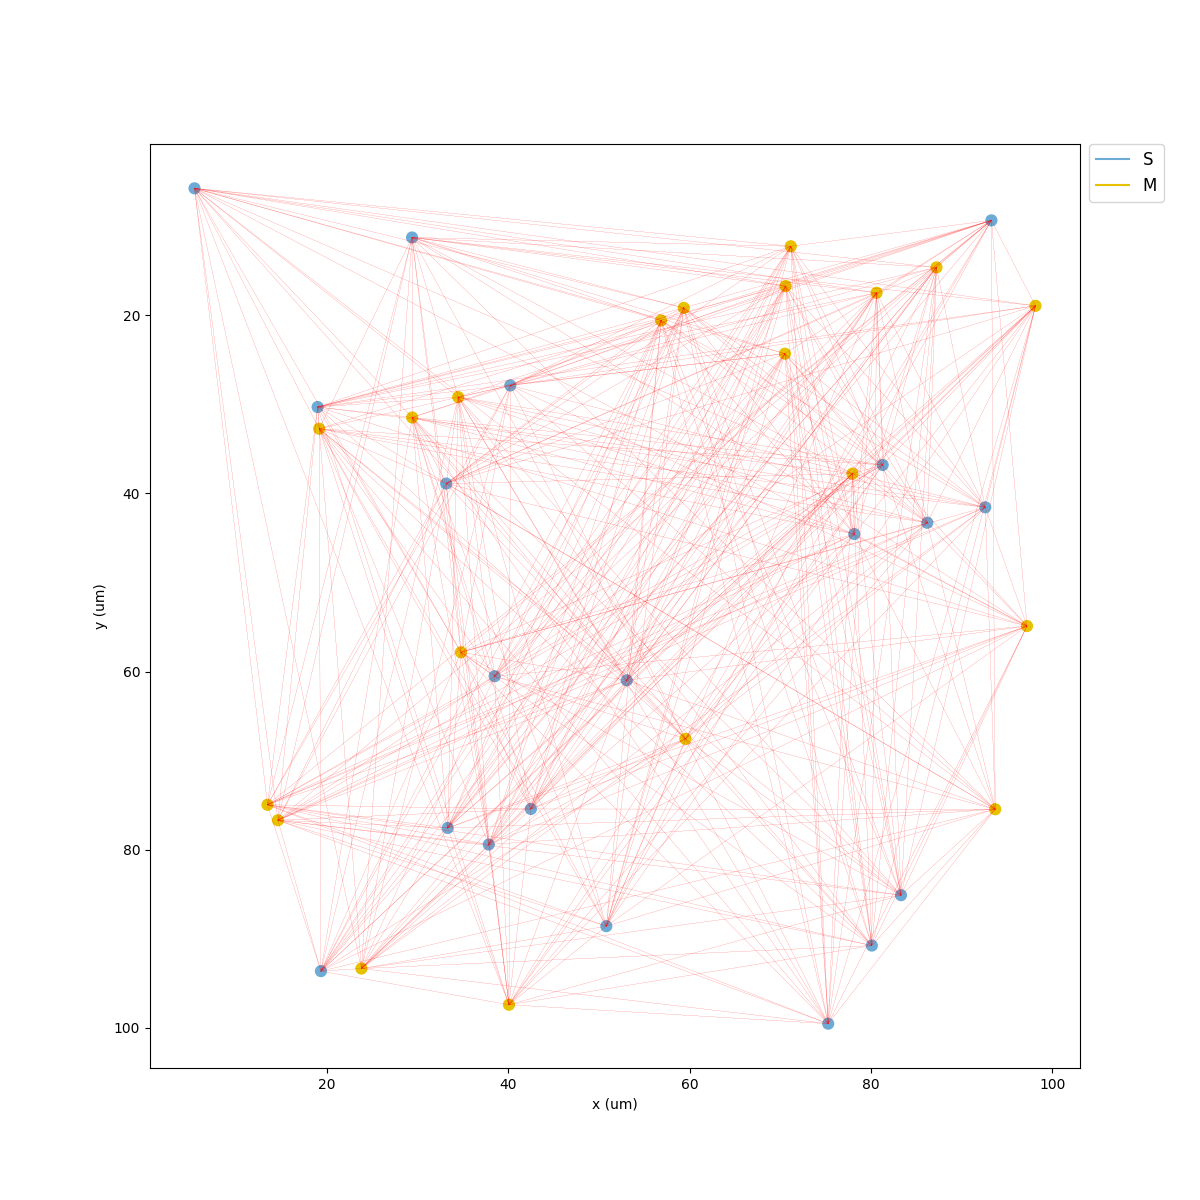

In [ ]:
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/tut8_batch_exercises/tut8_data_NetPar/'):
  if f_name.endswith('2Dnet.png'):
    list_of_files.append(f_name)
list_of_files.sort()
for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))

View the raster plots

NetPar_0_raster_gid.png


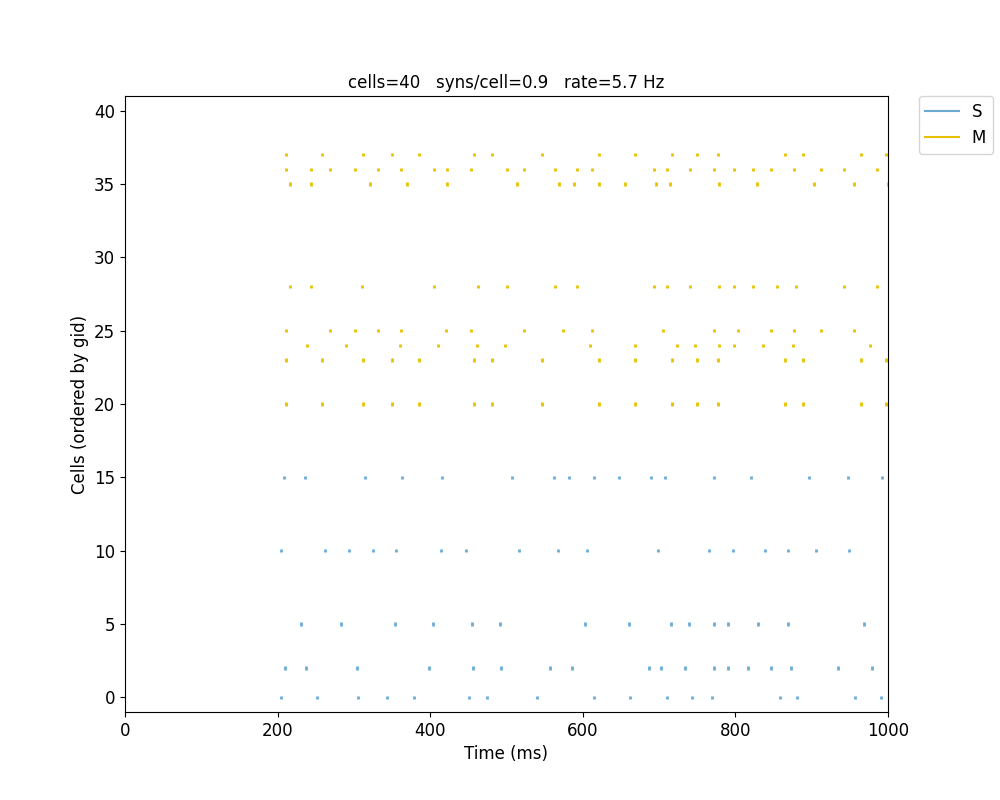

NetPar_1_raster_gid.png


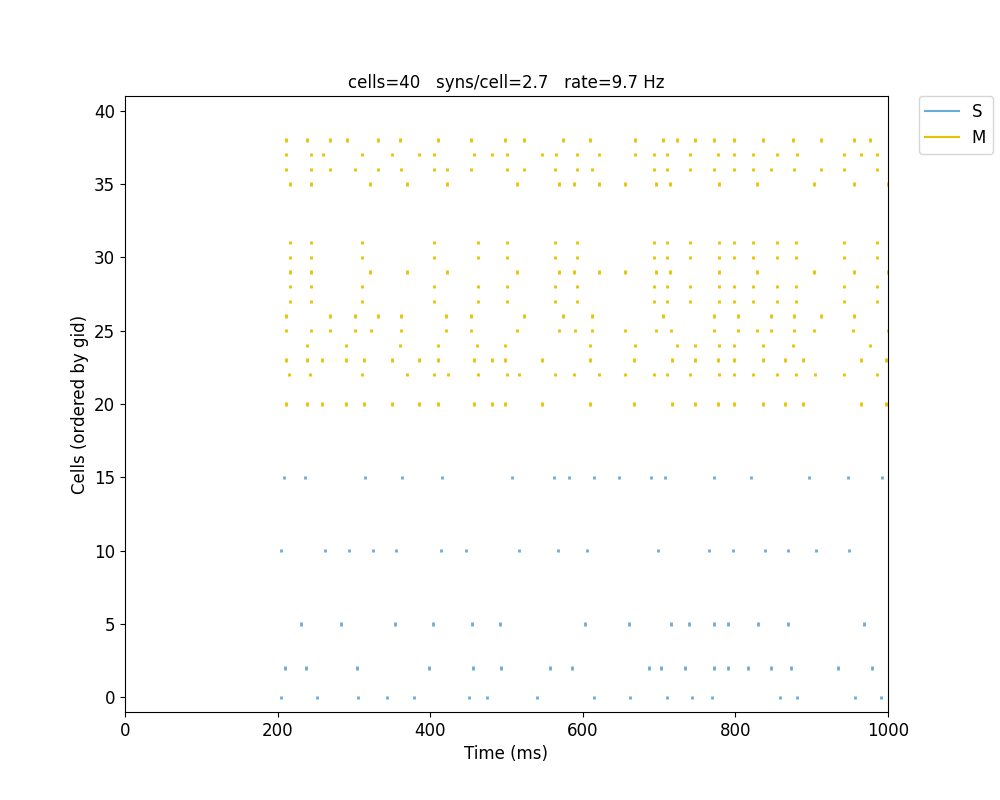

NetPar_2_raster_gid.png


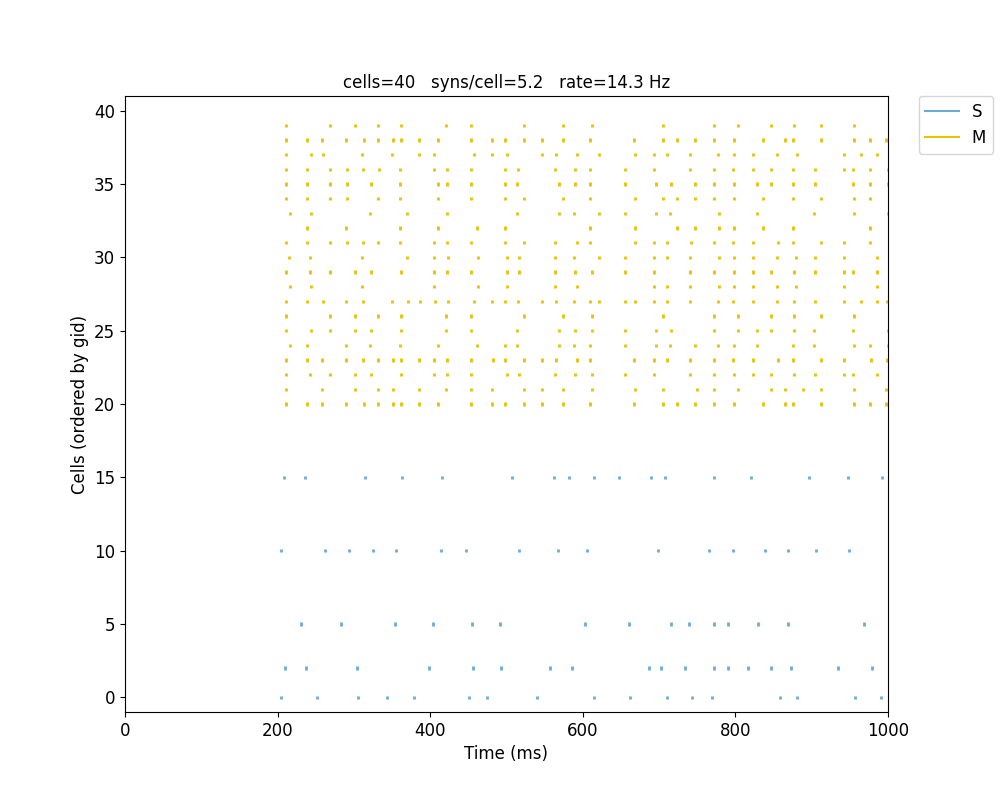

NetPar_3_raster_gid.png


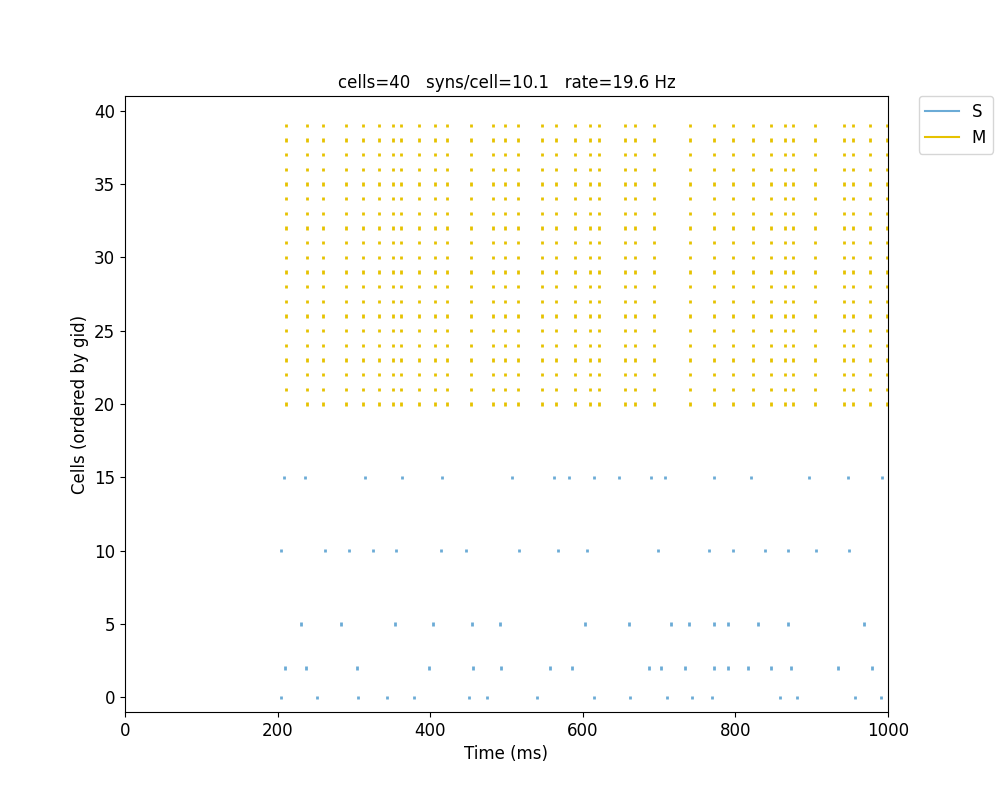

In [ ]:
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/tut8_batch_exercises/tut8_data_NetPar/'):
  if f_name.endswith('raster_gid.png'):
    list_of_files.append(f_name)
list_of_files.sort()
for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))